In [78]:
# load usual python packages
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
import datetime as dt
import pgeocode



#from tqdm import tqdm


# for reading and displaying images
#from skimage.io import imread
import matplotlib
%matplotlib inline
%config InlineBackend.figure_format='retina'
#from mpl_toolkits.axes_grid1 import make_axes_locatable
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.util import add_cyclic_point




# for creating validation set
#from sklearn.model_selection import train_test_split

# for evaluating the model
#from sklearn.metrics import accuracy_score
#from sklearn.metrics import f1_score
#from sklearn.utils import resample
#from sklearn.model_selection import GridSearchCV
#from sklearn.model_selection import TimeSeriesSplit
#from sklearn.model_selection import cross_val_predict

In [122]:
#load data
data_040101 = pd.read_csv('D:\\AIHack20\\nhs_data\\nhs_data\\040101.csv').dropna(axis=1)
QStatus_Age_Sex_v2 = pd.read_csv('D:/AIHack20/nhs_data/nhs_data/QStatus_Age_Sex-v2.csv')
achievement = pd.read_csv('D:/AIHack20/nhs_data/nhs_data/ACHIEVEMENT.csv')
bnf_sections = pd.read_csv('D:/AIHack20/nhs_data/nhs_data/bnf_sections.csv')
bnf_stems = pd.read_csv('D:/AIHack20/nhs_data/nhs_data/BNF_stems.csv')
adresses = pd.read_csv('D:/AIHack20/epraccur/epraccur.csv')
indicator_mappings = pd.read_csv('D:/AIHack20/nhs_data/nhs_data/INDICATOR_MAPPINGS.csv', sep=',',encoding='latin1')

In [121]:
data_040101.dropna(axis=1)

,Unnamed: 0,C83037,B86054,C87024,M81015,K84041,G83654,P92607,L83607,Y02162,...,C82669,J82136,A83016,A86025,P83623,A84021,G85708,K84035,L84007,D81037
0,2015-01-01,5095,2301,1505,2843,3311,938,1251,1109,2159,...,1249,3466,4956,4908,2264,3514,1989,3417,7245,1593
1,2015-02-01,4351,2030,1223,2414,3483,882,1267,1039,1934,...,943,2987,4352,5654,1823,3142,2133,2715,6566,1428
2,2015-03-01,4756,2505,1056,3117,3113,1111,1164,1077,1915,...,993,3446,4922,5852,2510,3500,1957,3350,7431,1367
3,2015-04-01,5241,2217,1270,2379,2839,1000,4579,1284,1921,...,1112,2364,4831,4629,2732,3392,2560,3212,6954,1433
4,2015-05-01,4567,2229,956,2017,3932,851,4482,1077,1992,...,1239,2766,5111,6393,2406,3104,2077,2947,6534,1807
5,2015-06-01,4215,1940,1217,2899,2602,765,4158,1430,1784,...,999,3258,5057,5124,2135,3666,2682,2686,7602,1793
6,2015-07-01,4173,2442,1201,3545,2979,1053,3865,1117,2899,...,1478,3097,4652,6140,2802,3535,2549,2552,6893,1259
7,2015-08-01,6775,2190,1037,2437,2485,602,3741,703,2354,...,966,3233,4649,4590,2253,2688,2366,2155,6265,1575
8,2015-09-01,5832,2438,1134,2570,3000,959,4148,1141,2970,...,1530,3498,4560,4614,2540,3408,2452,2408,7665,912
9,2015-10-01,5427,2345,1005,2781,3508,807,4296,1157,2491,...,1630,2964,5268,5558,1917,3144,2411,2722,8218,1360


In [123]:
nomi = pgeocode.Nominatim('gb')
# for another drug replace 'data_040101'
#first name in columns have to be skipped since it gives the date 
gp_practices = data_040101.columns[1:]

gp_pr_use_040101 = pd.DataFrame(gp_practices, columns=['practice_code'])
gp_pr_w_postcode = gp_pr_use_040101.merge(adresses, on='practice_code').dropna(axis=1)

gp_pr_w_postcode['longitude'] = nomi.query_postal_code(list(gp_pr_w_postcode['postcode'])).longitude
gp_pr_w_postcode['latitude'] = nomi.query_postal_code(list(gp_pr_w_postcode['postcode'])).latitude

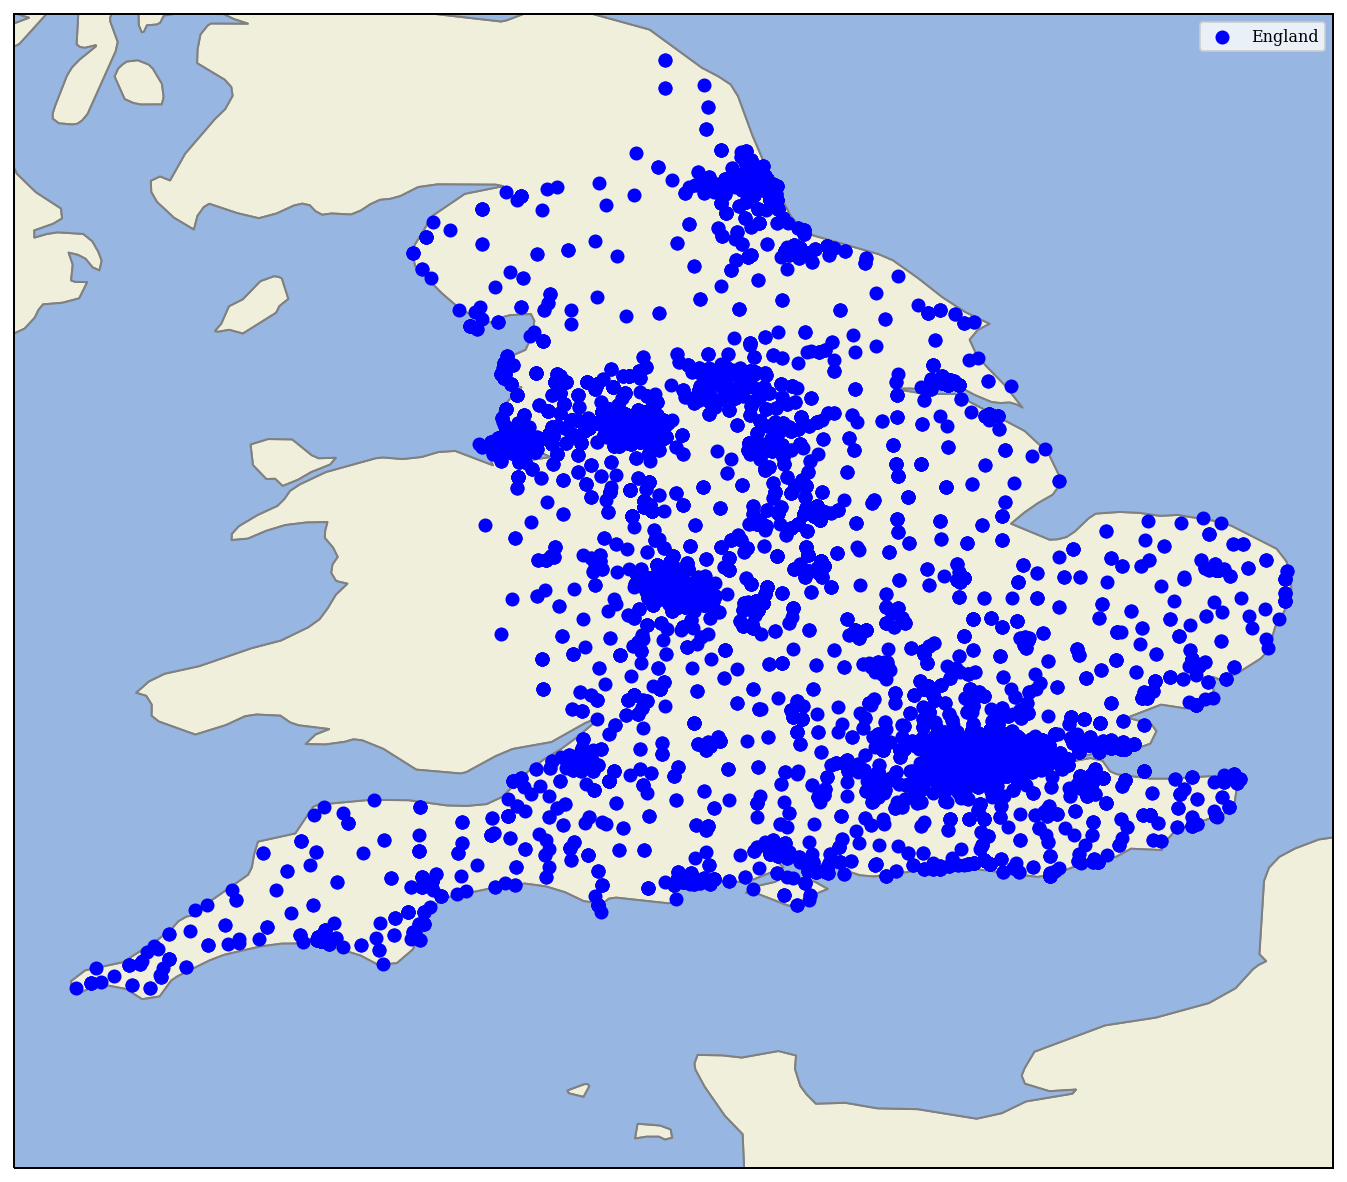

In [145]:
params = {
    'image.cmap': 'gray',
    'axes.labelsize': 10, # fontsize for x and y labels (was 10)
    'axes.titlesize': 10,
    'font.size': 8, # was 10
    'legend.fontsize': 8, # was 10
    'xtick.labelsize': 8,
    'ytick.labelsize': 8,
    'figure.figsize': [26, 28],
    'font.family': 'serif',
}

matplotlib.rcParams.update(params)

#fig = plt.figure(figsize=(6,12)) # tall figure
#ax = fig.add_subplot(1, 2, 1, projection='polar')
#im = ax.pcolormesh(t, r, c.T)
#fig.colorbar(im, ax=ax, shrink=0.2)

fig = plt.figure(figsize=(26,28))
ax1 = fig.add_subplot(1,2, 1,projection=ccrs.PlateCarree())
#ax1 = fig.add_subplot(121)
ax1.set_ylim(49,56)
ax1.set_xlim(-6,2)
ax1.set_aspect(1.0)
#ax1.add_feature(cfeature.COASTLINE, edgecolor='black')
ax1.add_feature(cfeature.BORDERS,edgecolor='grey')
ax1.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='grey',
                                        facecolor=cfeature.COLORS['land']))
ax1.add_feature(cfeature.NaturalEarthFeature('physical','ocean','50m',
                                             edgecolor='grey',
                                             facecolor=cfeature.COLORS['water']))
#ax1.add_feature(states_provinces)

plt.scatter(gp_pr_w_postcode['longitude'],gp_pr_w_postcode['latitude'], c='b', label='England',zorder=2)
plt.legend(loc='best')
#im1 = ax1.contourf(np.array(zg_dtrnd_norm_anom_1x1_2019['longitude']),np.array(zg_dtrnd_norm_anom_1x1_2019['latitude']),zg_dtrnd_norm_anom_1x1_2019[0],cmap='RdBu')
#im3 = ax1.contourf(np.array(pv_file['longitude']),np.array(pv_file['latitude']),pv_file[1]) 
#divider = make_axes_locatable(ax1)
#cax1 = divider.append_axes("right", size="5%", pad=0.05)
#fig.colorbar(ax=ax1,shrink=0.3)
plt.show()

In [5]:
data_01 = pd.read_csv('01.csv')

The system cannot find the path specified.
'pwd' is not recognized as an internal or external command,
operable program or batch file.


In [81]:
data

,Unnamed: 0,A89025,Y02531,C88622,L82022,E82046,N81005,N81631,B82019,C86609,...,Y06452,Y02158,Y06328,Y06585,Y05603,Y05045,Y03932,Y06481,Y05360,Y04984
0,2015-01-01,76476,21847.0,33190,150876,126647,179954,200.0,31330,65278,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-02-01,61913,15084.0,26903,134789,123052,145873,70.0,36104,52933,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-03-01,77136,18045.0,37182,151984,136232,152671,164.0,24737,56811,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-04-01,76502,16830.0,32541,155271,122547,190780,310.0,33976,59612,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-05-01,68521,19286.0,32354,143936,124466,148020,176.0,33069,57188,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2015-06-01,79059,17958.0,31114,156019,137610,139171,217.0,32023,51764,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2015-07-01,80104,18909.0,34330,171782,153875,172871,218.0,30824,65289,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2015-08-01,77034,13701.0,26378,162801,122378,161645,132.0,33879,56474,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2015-09-01,76805,9748.0,25012,147172,146559,170692,412.0,27803,59462,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2015-10-01,81460,1147.0,29745,168426,149299,177946,518.0,29044,67308,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
adresses[adresses['A81001'] == 'A89025']

,A81001,THE DENSHAM SURGERY,Y63,Q74,THE HEALTH CENTRE,LAWSON STREET,STOCKTON-ON-TEES,CLEVELAND,Unnamed: 8,TS18 1HU,...,01642 672351,Unnamed: 18,Unnamed: 19,Unnamed: 20,0,Unnamed: 22,00K.1,Unnamed: 24,4,Unnamed: 26
434,A89025,SUNDERLAND GP ALLIANCE MEDICAL PRACTICE,Y63,Q74,THE GALLERIES HEALTH CTR.,WASHINGTON,SUNDERLAND,TYNE & WEAR,NaN,NE38 7NQ,...,0191 4166130,NaN,NaN,NaN,0,NaN,00P,NaN,4,NaN


In [34]:
indicator_mappings

,INDICATOR_CODE,INDICATOR_DESCRIPTION,INDICATOR_POINT_VALUE,INDICATOR_GROUP_CODE,INDICATOR_GROUP_DESCRIPTION,DOMAIN_CODE,DOMAIN_DESCRIPTION,PATIENT_LIST_TYPE
0,AF001,The contractor establishes and maintains a reg...,5,AF,Atrial fibrillation,CL,Clinical,TOTAL
1,AF006,The percentage of patients with atrial fibrill...,12,AF,Atrial fibrillation,CL,Clinical,TOTAL
2,AF007,In those patients with atrial fibrillation wit...,12,AF,Atrial fibrillation,CL,Clinical,TOTAL
3,AST001,The contractor establishes and maintains a reg...,4,AST,Asthma,CL,Clinical,TOTAL
4,AST002,The percentage of patients aged 8 or over with...,15,AST,Asthma,CL,Clinical,TOTAL
5,AST003,"The percentage of patients with asthma, on the...",20,AST,Asthma,CL,Clinical,TOTAL
6,AST004,The percentage of patients with asthma aged 14...,6,AST,Asthma,CL,Clinical,TOTAL
7,BP002,The percentage of patients aged 45 or over who...,15,BP,Blood pressure,PH,Public Health,45OV
8,CAN001,The contractor establishes and maintains a reg...,5,CAN,Cancer,CL,Clinical,TOTAL
9,CAN003,"The percentage of patients with cancer, diagno...",6,CAN,Cancer,CL,Clinical,TOTAL


In [21]:
bnf_sections

,Unnamed: 0,code_stem,code_name,l1,l2,l3
0,0,1,Gastro-Intestinal System,1,NaN,NaN
1,1,101,Dyspep&Gastro-Oesophageal Reflux Disease,1,1.0,NaN
2,2,10101,Antacids and Simeticone,1,1.0,1.0
3,3,10102,Compound Alginates&Prop Indigestion Prep,1,1.0,2.0
4,4,102,Antispasmod.&Other Drgs Alt.Gut Motility,1,2.0,NaN
5,5,103,Antisecretory Drugs+Mucosal Protectants,1,3.0,NaN
6,6,10301,H2-Receptor Antagonists,1,3.0,1.0
7,7,10302,Selective Antimuscarinics,1,3.0,2.0
8,8,10303,Chelates And Complexes,1,3.0,3.0
9,9,10304,Prostaglandin Analogues,1,3.0,4.0


In [24]:
bnf_stems.sort_values(by='code_stem')

,code_stem,code_name
0,1,Gastro-Intestinal System
39,2,Cardiovascular System
79,3,Respiratory System
105,4,Central Nervous System
141,5,Infections
180,6,Endocrine System
208,7,"Obstetrics,Gynae+Urinary Tract Disorders"
227,8,Malignant Disease & Immunosuppression
244,9,Nutrition And Blood
284,10,Musculoskeletal & Joint Diseases


In [26]:
achievement

,PRACTICE_CODE,INDICATOR_CODE,MEASURE,VALUE
0,A81001,AF001,ACHIEVED_POINTS,5.00
1,A81001,AF001,REGISTER,106.00
2,A81001,AF006,ACHIEVED_POINTS,12.00
3,A81001,AF006,DENOMINATOR,21.00
4,A81001,AF006,EXCEPTIONS,1.00
5,A81001,AF006,NUMERATOR,20.00
6,A81001,AF007,ACHIEVED_POINTS,12.00
7,A81001,AF007,DENOMINATOR,97.00
8,A81001,AF007,EXCEPTIONS,1.00
9,A81001,AF007,NUMERATOR,88.00
